In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [2]:
alucar = pd.read_csv('inputs/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.isna().sum().sum()

0

In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

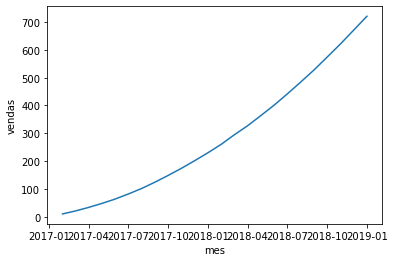

In [9]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [10]:
def plotar(titulo, x, y, xlabel, ylabel, dataset, largura=12, altura=6):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(largura,altura)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax=ax

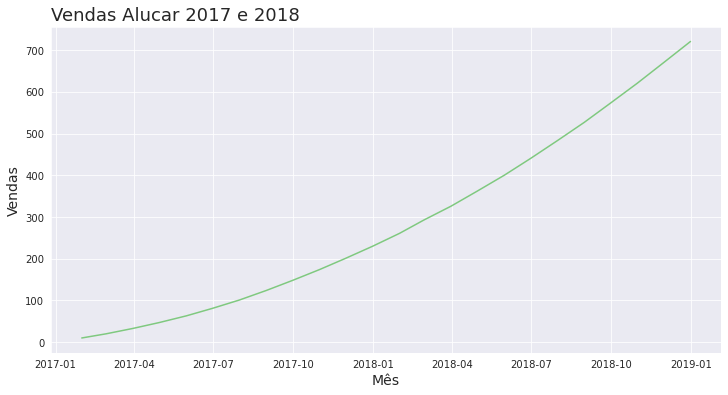

In [11]:
plotar('Vendas Alucar 2017 e 2018', 'mes', 'vendas', 'Mês', 'Vendas', alucar)

In [12]:
#para avaliar os crescimentos
#quantitativo
alucar['aumento'] = alucar['vendas'].diff()
#percentual
alucar['var%'] = alucar['vendas'].pct_change()
#aceleração
alucar['aceleracao']=alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,var%,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,10.0,1.000000,NaN
2,2017-03-31,33,13.0,0.650000,3.0
3,2017-04-30,47,14.0,0.424242,1.0
4,2017-05-31,63,16.0,0.340426,2.0


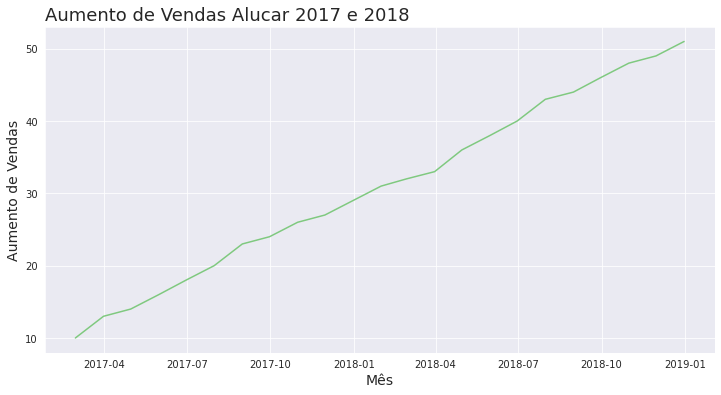

In [13]:
plotar('Aumento de Vendas Alucar 2017 e 2018', 'mes', 'aumento', 'Mês', 'Aumento de Vendas', alucar)

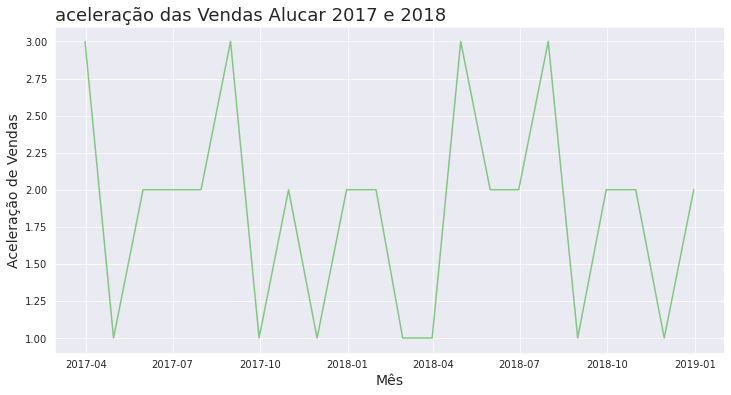

In [14]:
plotar('aceleração das Vendas Alucar 2017 e 2018', 'mes', 'aceleracao', 'Mês', 'Aceleração de Vendas', alucar)

In [15]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data = dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax

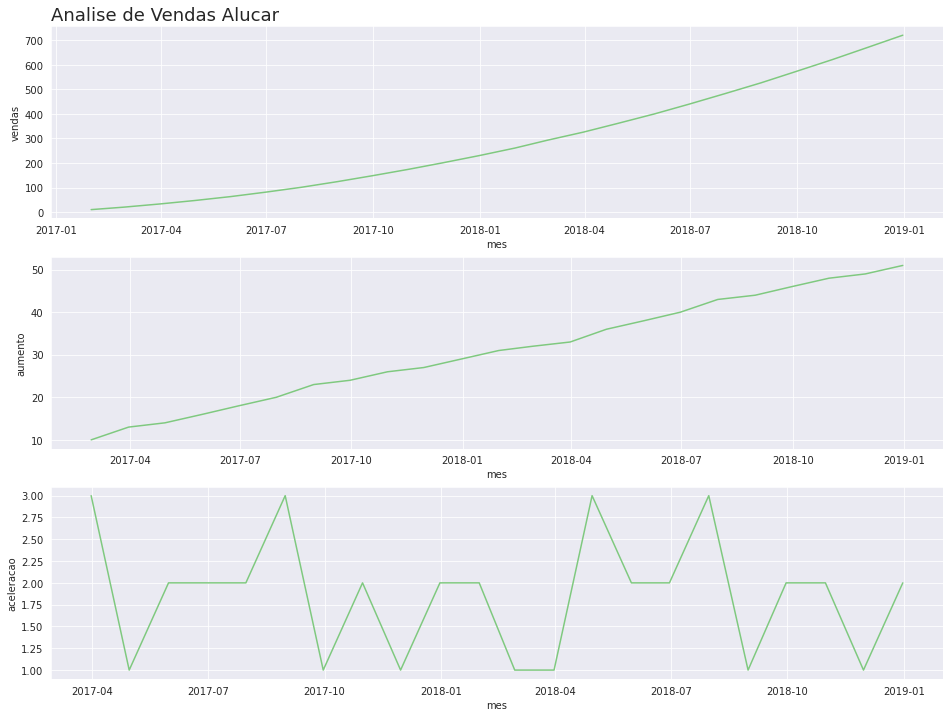

In [17]:
plot_comparacao('mes','vendas', 'aumento', 'aceleracao', alucar, 'Analise de Vendas Alucar')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

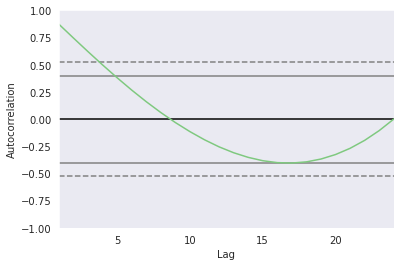

In [19]:
autocorrelation_plot(alucar['vendas'])